#  Random Forest Model Egypt

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np
import graphviz
import pydot

# Export model graph
from sklearn.tree import export_graphviz

## Input Data

In [2]:
df = pd.read_csv('../pro-test/data/egypt_1_drop_non_impact_params.csv')

## Remove spaces from column headings

In [3]:
df.columns = df.columns.str.replace(' ', '')

In [4]:
df.columns

Index(['recordnumber', 'nameofevent', 'startdate', 'endate', 'governorate',
       'district', 'disengcampas', 'location', 'gpslat', 'gpslong',
       'locationtype', 'tahrir', 'ittihadeyya', 'parliament', 'rabaa',
       'minofdef', 'sizeexact', 'sizeestimate', 'sizecategory',
       'demandtypeone', 'demandtypetwo', 'demandother', 'target', 'antiMB',
       'antiMorsi', 'antiSCAF', 'Morsifall', 'milintervene', 'organizer',
       'orgtype', 'orgMB', 'orgNSF', 'orgTamarod', 'youth/students',
       'laborers/workers', 'peasants/farmers', 'partymembers',
       'activists/movts', 'govworkers', 'business', 'residents', 'ultras',
       'salafis', 'copts', 'MB', 'soldiers', 'police', 'feloul', 'secularopp',
       'participantother', 'tacticprimary', 'tacticsecondary', 'campaign',
       'Tamarodcampaign', 'violence', 'propertydamage', 'MBproperty',
       'repression', 'repressiontype', 'policerepress', 'milrepress',
       'beltegeyyarepress', 'residentsrepress', 'partyrepress',
      

In [5]:
#Iris Dataset - this step can be ignored np => Pd; our dataframe is already in Pandas

from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data.drop(columns=['sepal length (cm)', 'sepal width (cm)'], inplace=True)
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
X = df.drop(columns=['killed']).values
y = df.killed.values
X

array([['201201004', nan, '12/31/2011', ..., 0, 0, 0],
       ['201201003', nan, '12/31/2011', ..., 0, 0, 0],
       ['201201012', nan, '12/31/2011', ..., 1, 0, 0],
       ...,
       ['2013062544', nan, '7/3/2013', ..., 0, 0, 0],
       ['2013062545', nan, '7/3/2013', ..., 0, 0, 0],
       ['2013062488', nan, '7/3/2013', ..., 0, 0, 0]], dtype=object)

In [43]:
# Convert string to int
# remove nan
#df['sizeestimate'] = df['sizeestimate'].astype(int)
df['sizeestimate'] = pd.to_numeric(df['sizeestimate'], errors='coerce')
df = df.dropna(subset=['sizeestimate'])

In [51]:
X = df['sizeestimate'].values
y = df.killed.values
type(X[0])
X = X.reshape(-1,1)

In [44]:
# Iris Data SEt
X = data.drop(columns=['target']).values
y = data.target.values


TypeError: 'float' object cannot be interpreted as an integer

In [52]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

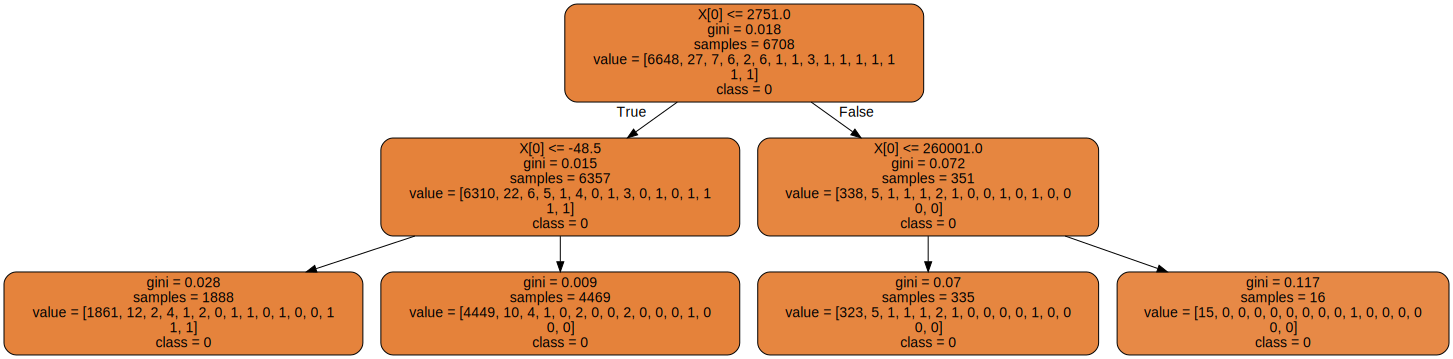

In [54]:
export_graphviz(tree_clf, out_file="egypt_1_drop_non_impact_params.csv", 
                #feature_names=df.drop(columns=['killed']).columns,
                class_names=['0','1','2'], 
                rounded=True, filled=True)

# Import model graph
with open("egypt_1_drop_non_impact_params.csv") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [55]:
export_graphviz(tree_clf, out_file="iris_tree.dot", 
                feature_names=data.drop(columns=['target']).columns,
                class_names=['0','1','2'], 
                rounded=True, filled=True)

# Import model graph
with open("iris_tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

ValueError: Length of feature_names, 2 does not match number of features, 1